### part 5 : application of unsupervised learning

Pick a dataset and perform an unsupervised learning on it. Your dataset has to be different from any dataset seen during the course.

Important: please try to justify your processing. Why is it interesting to do a clustering / dimensionality reduction / density estimation on this dataset ? What problem are we trying to solve ?

Suggestion of steps :

— present the dataset shortly in your own words (please do not copy a description from another resource) and link to the url where you downloaded it from.

— provide general analysis of the dataset, that studies its statistical properties, outliers, correlation matrices, or any other interesting analysis.

— if relevant or necessary, preprocess the data, and to justify this preprocessing. You could compare the results obtained with and without preprocessing.

— discuss the relevant optimization details

— (mandatory) provide an evaluation or multiple evaluations of the results, thanks to scorings of your choice.

— for a clustering, it can be an inertia, a normalized cut...

— for a dimensionality reduction, the explained variance

— for a density estimation, the kullbach leibler divergence between the da-
taset and a dataset sampled from the estimated distribution

— but you are encouraged to use other evaluations if they are more relevant for your processing.

— Feel free to add useful visualizations for each step of your processing.

— discuss the results obtained. Have we solved a problem with this processing ?


Some resources to find datasets (but you probably know other good resources already) : Link 1, Link 2, Link 4. If necessary, you can tweak a dataset in order to artificially make it possible to apply techniques that you like, or downsample it.

This is not a production project and you are encouraged to experiment.

## Dataset presentation

First of all, we will present the dataset we choose. We choose the dataset "Breast Cancer Wisconsin (Diagnostic) Data Set" (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/) from Kaggle. This dataset is composed of 569 instances and 32 features.

The goal is to predict if a tumor is benign or malignant.

#### Features description

**Informative features:**
- id: ID number **(suppressed for anonymization)**
- diagnosis: The diagnosis of breast tissues (M = malignant, B = benign) **(suppressed for evaluation, and replace by 1 for malignant and 0 for benign)**

**Usable features:**

Ten real-valued features are computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features


#### First step: Reading the dataset and removing informative features

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")

# Save labels in a new variable
LABELS = df['diagnosis'].map({'M':1,'B':0})

# Drop useless columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df.drop('diagnosis',axis=1,inplace=True)

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Second step: Data analysis

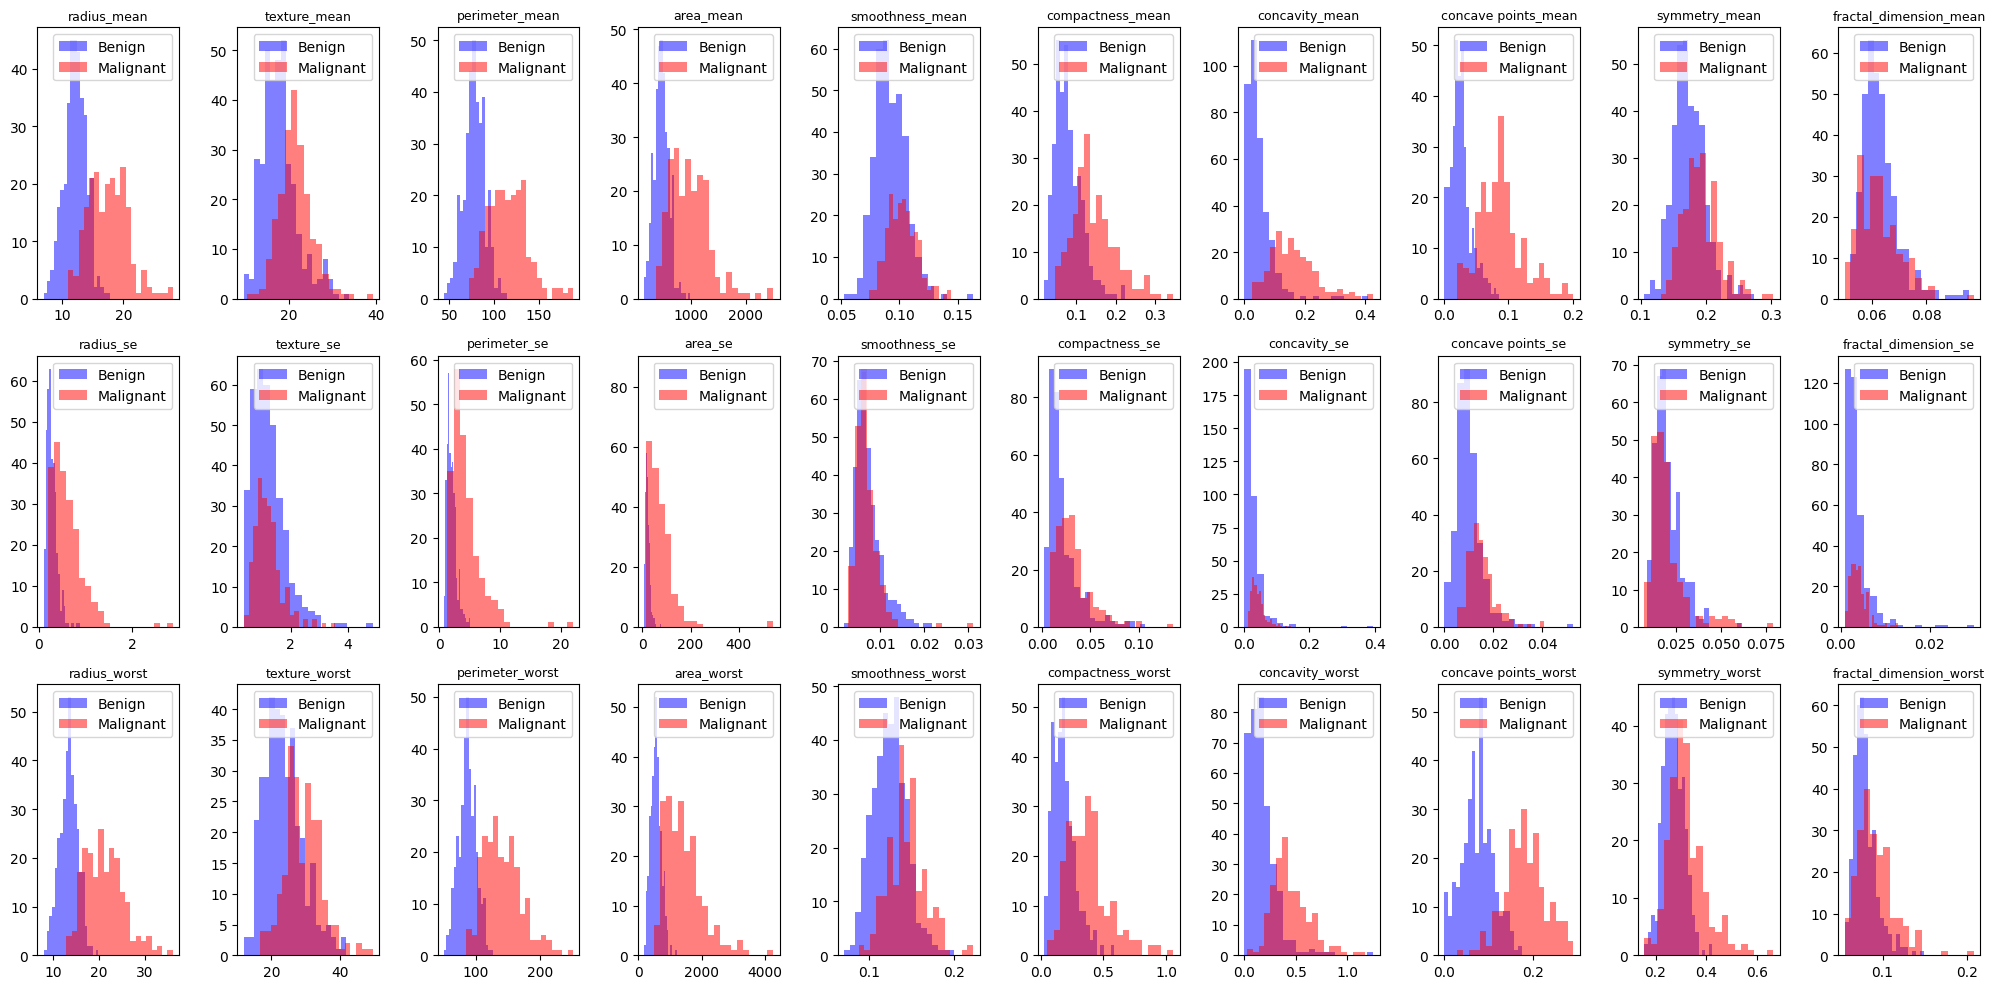

In [2]:
import matplotlib.pyplot as plt

# Subpot 3 rows of 10 columns

fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 10))

# For each feature, plot the histogram of benign and malignant values

for i, ax in enumerate(axes.flat):
    ax.hist(df[df.columns[i]][LABELS==0], bins=20, alpha=0.5, label='Benign', color='blue')
    ax.hist(df[df.columns[i]][LABELS==1], bins=20, alpha=0.5, label='Malignant', color='red')
    ax.set_title(df.columns[i], fontsize=9)
    ax.legend()

plt.tight_layout()
plt.show()

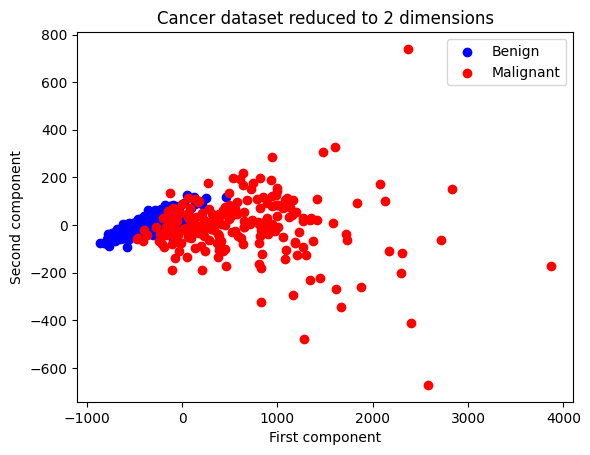

In [45]:
# Use the PCA to reduce the dimensionality of the dataset 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)


# Plot the result

plt.scatter(df_pca[LABELS==0,0], df_pca[LABELS==0,1], color='blue', label='Benign')
plt.scatter(df_pca[LABELS==1,0], df_pca[LABELS==1,1], color='red', label='Malignant')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Cancer dataset reduced to 2 dimensions')
plt.legend()
plt.show()


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Create a KMeans model with 2 clusters

Finded_labels = KMeans(n_clusters=2, n_init="auto").fit_predict(df_pca)

print("Accuracy score: ", accuracy_score(LABELS, Finded_labels))


Accuracy score:  0.14586994727592267


In [11]:
# Create a KNN model with 2 clusters

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(df_pca, LABELS)
Finded_labels = knn.predict(df_pca)

print("Accuracy score: ", accuracy_score(LABELS, Finded_labels))

Accuracy score:  0.9507908611599297


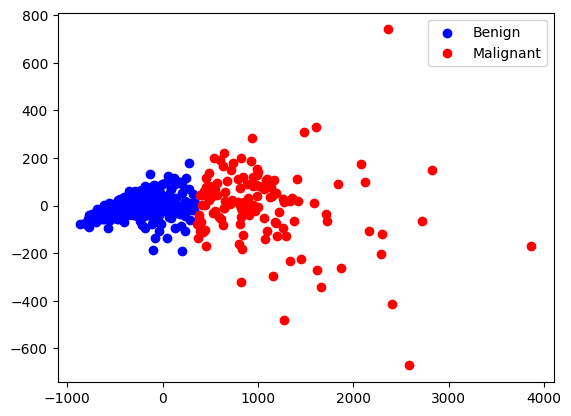

In [39]:
# Plot the result

plt.scatter(df_pca[Finded_labels==0,0], df_pca[Finded_labels==0,1], color='blue', label='Benign')
plt.scatter(df_pca[Finded_labels==1,0], df_pca[Finded_labels==1,1], color='red', label='Malignant')
plt.legend()
plt.show()

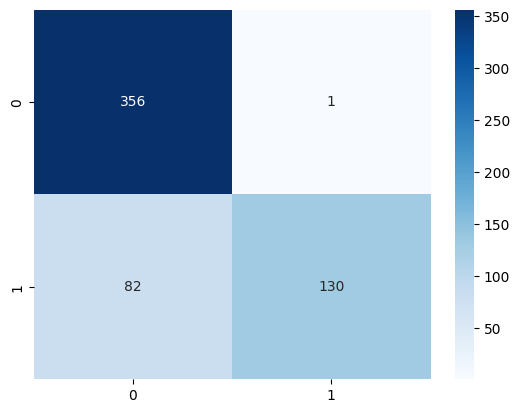

In [40]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(LABELS, Finded_labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

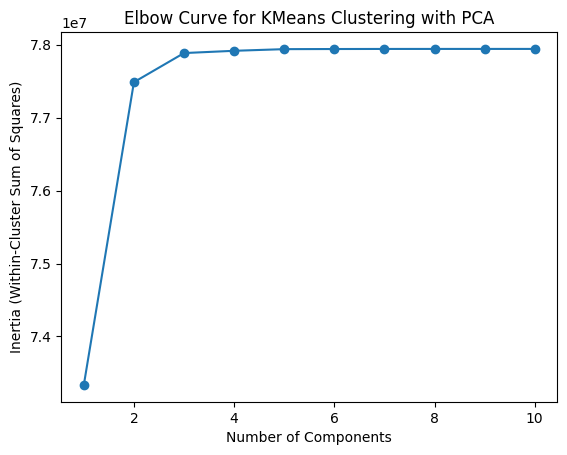

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X is your data
# Choose a range of components to test
n_components_range = range(1, 11)

inertias = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df)

    kmeans = KMeans(n_clusters=2, n_init="auto")
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.plot(n_components_range, inertias, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Curve for KMeans Clustering with PCA')
plt.show()